<a href="https://colab.research.google.com/github/RecSys-lab/MM-VideoRec/blob/main/visualization_of_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MM-VideoRec: Visualization of Results**

**I. Data Loading**

In [7]:
import pandas as pd

# Variables
csvFilePath = 'https://raw.githubusercontent.com/RecSys-lab/MM-VideoRec/refs/heads/main/evaluation.csv'

# Load CSV into a DataFrame
evalDf = pd.read_csv(csvFilePath)
evalDf.head()

,Model,Data,NoModality,Textual,Visual,Audio,NoFusion,FusedPCA,FusedCCA,Recall10,NDCG10,ColdRate10,Coverage10,PopBias,Fairness,Novelty,Diversity,CalibrationBias
0,MF,-,1,0,0,0,1,0,0,0.077,0.130,0.011,0.651,0.019,0.339,11.546,0.796,5.138
1,TopPop,-,1,0,0,0,1,0,0,0.126,0.210,0.066,0.100,0.039,0.196,10.587,0.806,3.640
2,VAECF,-,1,0,0,0,1,0,0,0.249,0.358,0.015,0.867,0.025,0.350,11.272,0.720,3.564
3,VBPR,Text-rawOpenAI,0,1,0,0,1,0,0,0.237,0.359,0.023,0.817,0.034,0.254,10.893,0.770,2.832
4,VBPR,Text-rawLlama,0,1,0,0,1,0,0,0.225,0.339,0.026,0.807,0.028,0.264,11.078,0.782,2.704


**II. Bar Chart to Show the Impact of Augmentation on Text Data**

In [30]:
# Filter the main DF to have only related data for a bar chart
textualDf = evalDf[(evalDf['Textual'] == 1) & (evalDf['NoFusion'] == 1)][['Model', 'Data', 'Recall10', 'NDCG10']]

# Improved DF cells
textualDf = textualDf.rename(columns={'Recall10': 'Recall@10', 'NDCG10': 'NDCG@10'})
textualDf['Data'] = textualDf['Data'].str.replace('Text-', '', regex=False)
textualDf['Data'] = textualDf['Data'].str.replace('raw', 'Raw ', regex=False)
textualDf['Data'] = textualDf['Data'].str.replace('llm', 'LLM ', regex=False)

# Inform the user
print(f'✨ Unimodal Text Data has {len(textualDf)} instances, such as:\n')
print(textualDf.head(5))

# Various frames
textualDf_amr_ndcg = textualDf[textualDf['Model'] == 'AMR'][['Data', 'NDCG@10']]
textualDf_vbpr_ndcg = textualDf[textualDf['Model'] == 'VBPR'][['Data', 'NDCG@10']]
textualDf_amr_recall = textualDf[textualDf['Model'] == 'AMR'][['Data', 'Recall@10']]
textualDf_vbpr_recall = textualDf[textualDf['Model'] == 'VBPR'][['Data', 'Recall@10']]

✨ Unimodal Text Data has 12 instances, such as:

  Model        Data  Recall@10  NDCG@10
3  VBPR  Raw OpenAI      0.237    0.359
4  VBPR   Raw Llama      0.225    0.339
5  VBPR      Raw ST      0.232    0.342
6  VBPR  LLM OpenAI      0.241    0.362
7  VBPR   LLM Llama      0.224    0.340


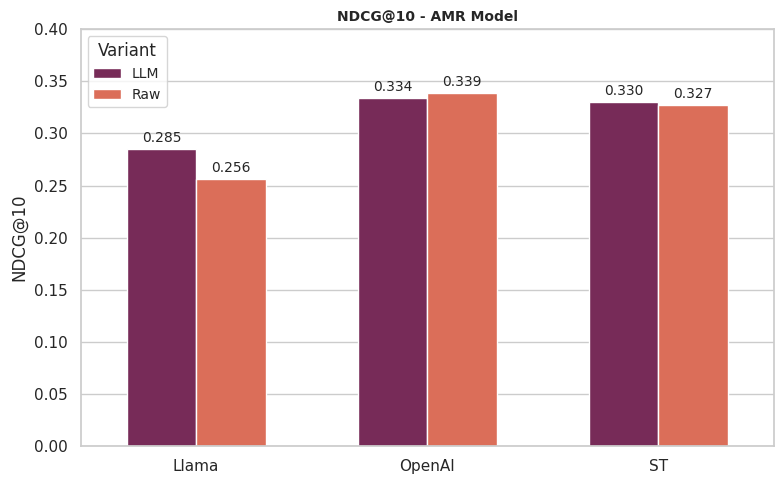

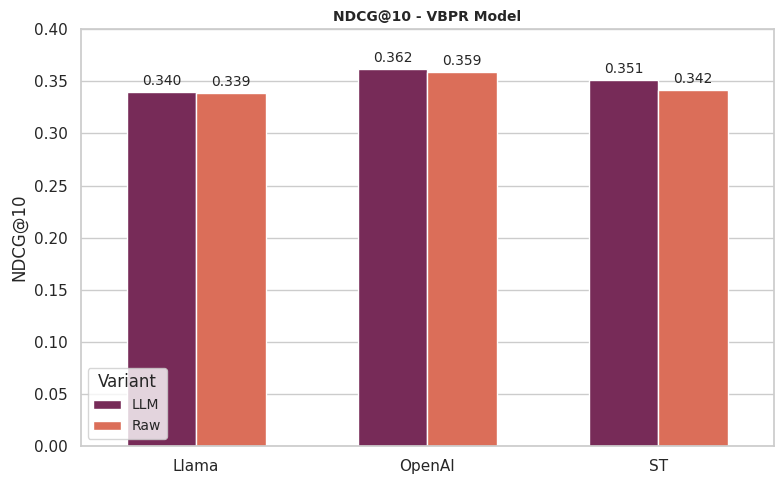

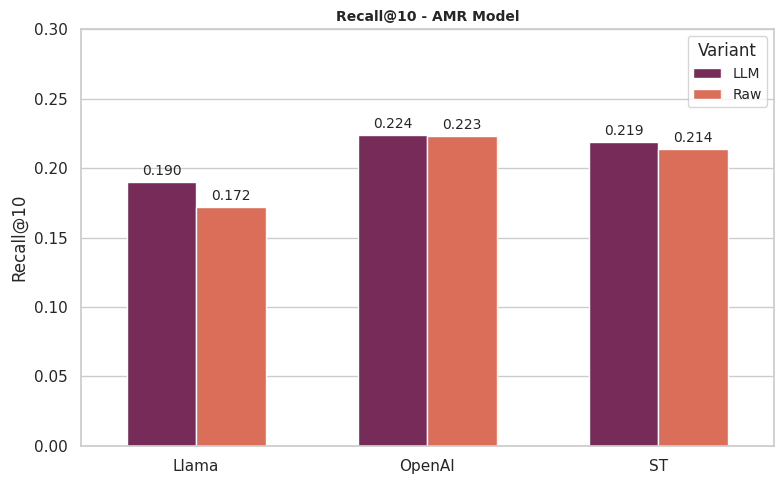

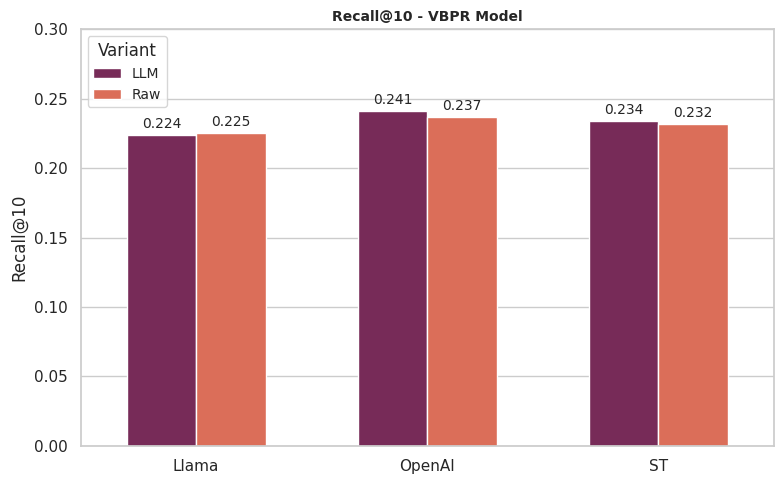

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn theme
sns.set(style="whitegrid")
palette = sns.color_palette("rocket", n_colors=2)  # "pastel", "husl", etc.

# Extracting Source and Type for Raw and LLM Groupping
textualDf_amr_ndcg[['Type', 'Source']] = textualDf_amr_ndcg['Data'].str.split(' ', expand=True)
textualDf_vbpr_ndcg[['Type', 'Source']] = textualDf_vbpr_ndcg['Data'].str.split(' ', expand=True)
textualDf_amr_recall[['Type', 'Source']] = textualDf_amr_recall['Data'].str.split(' ', expand=True)
textualDf_vbpr_recall[['Type', 'Source']] = textualDf_vbpr_recall['Data'].str.split(' ', expand=True)

# Pivoting the DFs to have OpenAI/Llama/ST in rows and Raw/LLM in columns
pivotTextualDf_amr_ndcg = textualDf_amr_ndcg.pivot(index='Source', columns='Type', values='NDCG@10')
pivotTextualDf_vbpr_ndcg = textualDf_vbpr_ndcg.pivot(index='Source', columns='Type', values='NDCG@10')
pivotTextualDf_amr_recall = textualDf_amr_recall.pivot(index='Source', columns='Type', values='Recall@10')
pivotTextualDf_vbpr_recall = textualDf_vbpr_recall.pivot(index='Source', columns='Type', values='Recall@10')

# Reseting the indices
dfPlot_amr_ndcg = pivotTextualDf_amr_ndcg.reset_index().melt(id_vars='Source', var_name='Type', value_name='NDCG@10')
dfPlot_vbpr_ndcg = pivotTextualDf_vbpr_ndcg.reset_index().melt(id_vars='Source', var_name='Type', value_name='NDCG@10')
dfPlot_amr_recall = pivotTextualDf_amr_recall.reset_index().melt(id_vars='Source', var_name='Type', value_name='Recall@10')
dfPlot_vbpr_recall = pivotTextualDf_vbpr_recall.reset_index().melt(id_vars='Source', var_name='Type', value_name='Recall@10')

# Chart dictionary
charts = {
    'AMR-NDCG': dfPlot_amr_ndcg,
    'VBPR-NDCG': dfPlot_vbpr_ndcg,
    'AMR-Recall': dfPlot_amr_recall,
    'VBPR-Recall': dfPlot_vbpr_recall
}

# Creating charts
for chart in charts:
  # Variables
  model = chart.split('-')[0] # AMR/VBPR
  metric = chart.split('-')[1] # NDCG/Recall
  dfPlot = charts[chart]
  valueCol = f'{metric}@10'
  range = 0.3 if metric == 'Recall' else 0.4

  # Plotting
  plt.figure(figsize=(8, 5))
  ax = sns.barplot(data=dfPlot, x='Source', y=valueCol, hue='Type',
                   palette=palette, dodge=0.3, width=0.6)

  # Add value labels on top of bars
  for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10, padding=3)

  # Formatting
  plt.title(f'{metric}@10 - {model} Model', weight='bold', fontsize=10)
  plt.ylim(0, range)
  plt.ylabel(valueCol)
  plt.xlabel('')
  plt.legend(title='Variant', title_fontsize=12, fontsize=10)
  plt.tight_layout()
  plt.savefig(f'Text_{chart}.pdf', dpi=300)
  plt.show()

**II. Scatter Chart to Show the Impact Data Modality**

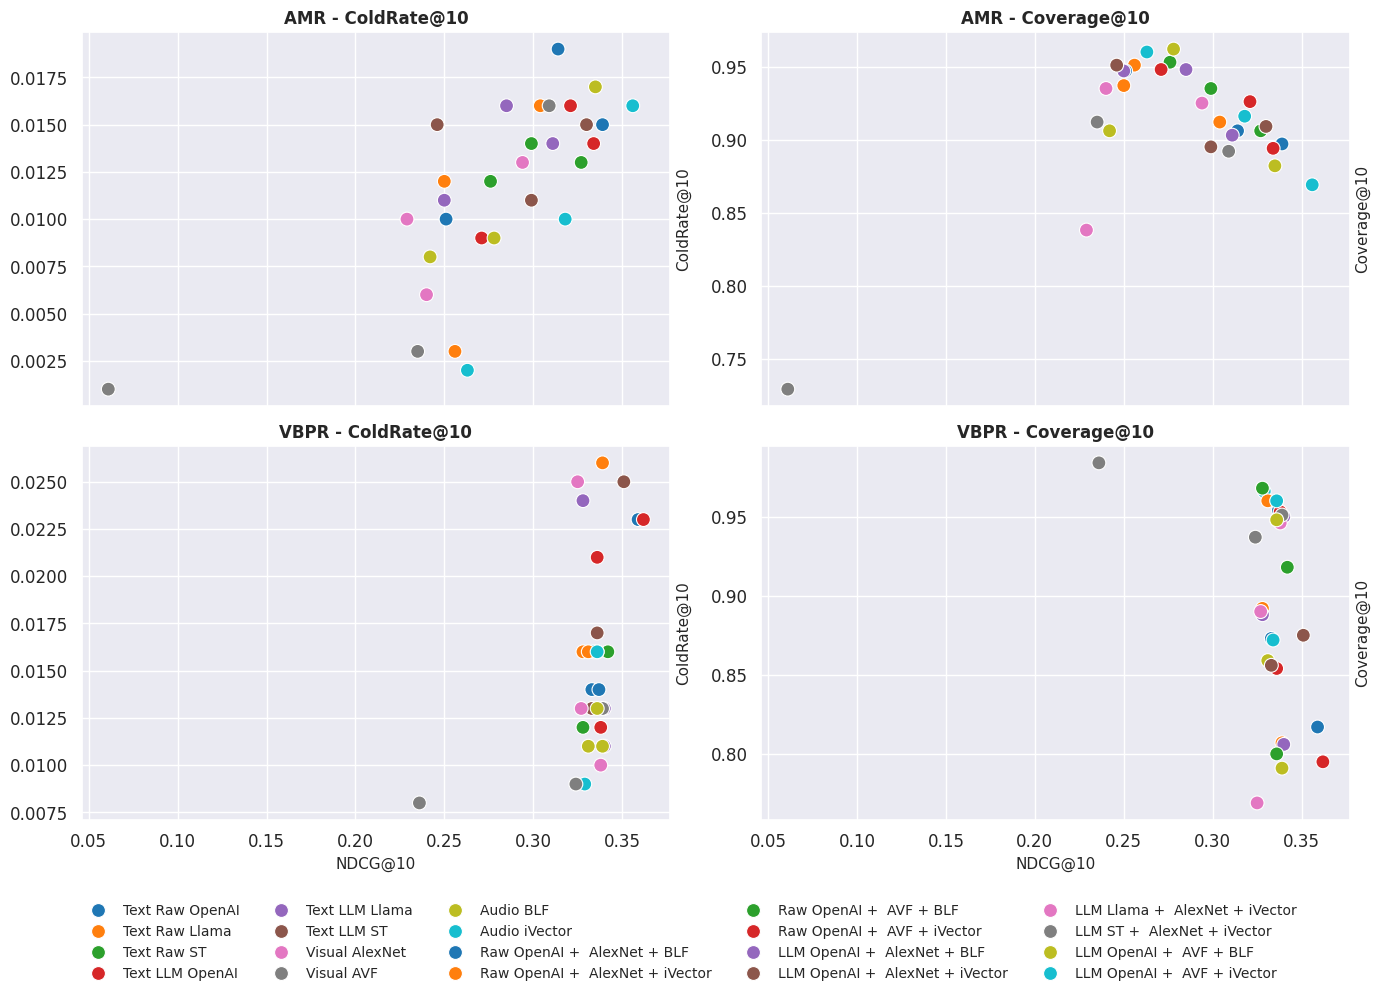

In [121]:
# Keep a copy of evalDF
evalDf_copy = evalDf.copy()

# Improved DF cells
evalDf_copy = evalDf_copy.rename(columns={'ColdRate10': 'ColdRate@10', 'NDCG10': 'NDCG@10', 'Coverage10': 'Coverage@10'})
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('-', ' ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('Text raw', 'Text Raw ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('Text llm', 'Text LLM ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('CNN', 'AlexNet', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('rawOpenAI', 'Raw OpenAI + ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('llmOpenAI', 'LLM OpenAI + ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('llmLlama', 'LLM Llama + ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('llmST', 'LLM ST + ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('AlexNet BLF', 'AlexNet + BLF', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('AlexNet IV', 'AlexNet + iVector', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('AVF BLF', 'AVF + BLF', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('AVF IV', 'AVF + iVector', regex=False)

# Filter the main DF to have only related data for the chart
coldRateDF_amr = evalDf_copy[evalDf_copy['Model'] == 'AMR'][['Data', 'NDCG@10', 'ColdRate@10']]
coverageDF_amr = evalDf_copy[evalDf_copy['Model'] == 'AMR'][['Data', 'NDCG@10', 'Coverage@10']]
coldRateDF_vbpr = evalDf_copy[evalDf_copy['Model'] == 'VBPR'][['Data', 'NDCG@10', 'ColdRate@10']]
coverageDF_vbpr = evalDf_copy[evalDf_copy['Model'] == 'VBPR'][['Data', 'NDCG@10', 'Coverage@10']]

# Chart dictionary
charts = {
    'AMR-ColdRate': coldRateDF_amr,
    'AMR-Coverage': coverageDF_amr,
    'VBPR-ColdRate': coldRateDF_vbpr,
    'VBPR-Coverage': coverageDF_vbpr
}

# Preparing the chart
sns.set_theme(style="darkgrid", font_scale=1.1)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()  # Flatten the 2D array for easy indexing

# Collect handles/labels for a shared legend
handles, labels = [], []

# Loop through charts and axes
for i, (chart, dfPlot) in enumerate(charts.items()):
    model = chart.split('-')[0]  # AMR/VBPR
    metric = chart.split('-')[1]  # ColdRate/Coverage
    valueCol = f'{metric}@10'

    ax = axes[i]
    scatter = sns.scatterplot(
        data=dfPlot, x='NDCG@10', y=valueCol, hue='Data',
        s=100, ax=ax, palette='tab10')
    ax.set_title(f'{model} - {metric}@10', weight='bold', fontsize=12)
    ax.set_xlabel('NDCG@10', fontsize=11)
    ax.set_ylabel(f'{metric}@10', fontsize=11)
    ax.yaxis.set_label_position("right")
    ax.grid(True)

    # Capture legend handles/labels only once
    if i == 0:
      handles, labels = ax.get_legend_handles_labels()
    ax.legend().remove()  # Remove individual legends

# Shared legend at the bottom
fig.legend(handles, labels, loc='lower center', ncol=5,
    fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for the legend
plt.subplots_adjust(bottom=0.17)
plt.savefig(f'Combined.pdf', dpi=300)
plt.show()